**ELECTRONIC VEHICLE TYPE CLASSIFICATION**

This project is to develop a classification model that can accurately identify the type of electric vehicle, distinguishing between Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), with the aim of gaining in-depth knowledge and insights into electric vehicle classification.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
#Import the libraries that we needed

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#read the dataset
df=pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')
# Displaying the first rows of the dataset
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
#Displaying the last five rows of dataset
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
130442,5YJ3E1EA5M,Pierce,Puyallup,WA,98375.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,180473639,POINT (-122.30116 47.1165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


Here’s a brief overview of some key features:

**VIN(1-10)** : This refers to the Vehicle Identification Number (VIN),The VIN is a 10-character string of letters and numbers without intervening spaces

**County**: This term typically refers to a geographical division within a state or country. It represents an administrative region and is often used for purposes such as local government, taxation, and statistical reporting.

**City**: A city is an urban area with a high population density, infrastructure, and various amenities. Cities serve as centers of commerce, culture, and social life.

**State**: A state is a political division within a country. Each state has its own government, laws, and administrative structure. In the United States, for example, there are 50 states.

**Postal Code**: Also known as a ZIP code (in the United States), a postal code is a numerical code used by postal services to facilitate the efficient delivery of mail. It helps identify specific geographic areas within a city or region.

**Model Year**: The model year represents the year in which a vehicle model was manufactured. It is often denoted by a single character (such as a letter) within the VIN.

**Make**: The make of a vehicle refers to its manufacturer or brand. For example, Toyota, Ford, or Honda are different makes.

**Model**: The model of a vehicle specifies its particular design and features.

**Electric Vehicle Type**: This term likely relates to the type of electric vehicle (EV). EVs can be fully electric (battery-powered) or hybrid (combining electric and internal combustion engine technologies).

**Clean Alternative Fuel Vehicle (CAFV) Eligibility**: CAFV eligibility indicates whether a vehicle qualifies as a clean alternative fuel vehicle. These vehicles use fuels other than traditional gasoline or diesel, such as electricity, natural gas, or hydrogen.

**Electric Range**: Electric range refers to the maximum distance an electric vehicle can travel on a single charge. It’s an essential factor for EV buyers.

**Base MSRP**: The Manufacturer’s Suggested Retail Price (MSRP) is the initial price set by the manufacturer for a new vehicle. The base MSRP excludes additional features, taxes, and fees.

**Legislative District**: This term relates to political boundaries defined for representation in legislative bodies (such as state or national assemblies). It helps determine which district a vehicle belongs to.

**DOL Vehicle ID**: The Department of Licensing (DOL) assigns a unique identifier to each registered vehicle. This ID is used for administrative purposes.

**Vehicle Location**: This likely refers to the physical location of the vehicle, such as the city or state where it is currently located.

**Electric Utility**: Electric utilities provide electricity to consumers. In the context of EVs, this term might relate to the utility company responsible for supplying power to charge electric vehicles.

**2020 Census Tract**: Census tracts are small geographic areas used for collecting demographic data during the decennial census. They help analyze population distribution and characteristics.

Displaying the datatypes of dataset

In [ ]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [ ]:
#Displaying the shape of dataset
df.shape

(130443, 17)

His dataset has 130443 rows and 17 columns

In [ ]:
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,130443,130440,130440,130443,130440.000000,130443.000000,130443,130221,130443,130443,130443.000000,130443.000000,130138.000000,1.304430e+05,130410,130440,1.304400e+05
unique,8827,166,656,46,NaN,NaN,35,121,2,3,NaN,NaN,NaN,NaN,773,75,NaN
top,5YJYGDEE0M,King,Seattle,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,467,68477,22894,130138,NaN,NaN,59629,25311,100156,60551,NaN,NaN,NaN,NaN,3384,47490,NaN
mean,NaN,NaN,NaN,NaN,98167.633878,2019.554633,NaN,NaN,NaN,NaN,76.705718,1495.677346,29.577026,2.051796e+08,NaN,NaN,5.297177e+10
std,NaN,NaN,NaN,NaN,2492.197784,2.989137,NaN,NaN,NaN,NaN,99.421571,9844.748414,14.767508,8.710573e+07,NaN,NaN,1.640658e+09
min,NaN,NaN,NaN,NaN,1730.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,1.081042e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2018.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.568004e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98121.000000,2020.000000,NaN,NaN,NaN,NaN,23.000000,0.000000,34.000000,2.034934e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98370.000000,2022.000000,NaN,NaN,NaN,NaN,151.000000,0.000000,43.000000,2.290791e+08,NaN,NaN,5.305307e+10


 It is used in Python with the pandas library to provide a statistical summary of a DataFrame, df. The .describe(include='all') method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values and all kind datatype.

 the output typically includes for each column:

count: The number of non-missing values.

mean: The mean of the values.

std: The standard deviation of the values.

min: The minimum value.

25%: The 25th percentile (also known as the first quartile).

50%: The 50th percentile (also known as the median or the second quartile).

75%: The 75th percentile (also known as the third quartile).

max: The maximum value.

The include='all' will give you additional statistics for non-numeric columns, such as:

unique: The number of unique values.

top: The most common value.

freq: The most common value’s frequency

**DATA PREPARATION**

PREPROCESSING

Checking the null values in the dataset

In [ ]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

VIN (1-10), State, Model Year, Make, Electric Vehicle Type, CAFV Eligibility, Electric Range, Base MSRP, DOL Vehicle ID: These columns have 0 missing values, which means there are no NaN entries in these columns.

County, City, Postal Code, Electric Utility, 2020 Census Tract: Each of these columns has 3 missing values. You might want to investigate why these values are missing and consider imputing them or handling them appropriately.

Model: This column has 222 missing values, which is quite significant. Depending on the size of your dataset, this could be a substantial proportion of the data. You’ll need to decide how to handle these missing entries, possibly by imputing, removing, or analyzing the impact of these missing values on your analysis.

Legislative District: With 305 missing values, this column has the most number of missing entries.

Vehicle Location: There are 33 missing values in this column.

In [ ]:
# show columns that have missing values
df.columns[df.isnull().any()]

Index(['County', 'City', 'Postal Code', 'Model', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [3]:
# drop the missing values on the subset County and City
df.dropna(subset=['County', 'City'], inplace=True)

The code drops rows from the DataFrame where either the ‘County’ or ‘City’ column has missing values (NaN).

In [ ]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 302
DOL Vehicle ID                                         0
Vehicle Location                                      30
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

Here we have only null values in Model,Legislative District,Vehicle Utility . Here Legislative District is a numerical data and other two are categorical datas.

Fill the missing values in numerical data it is done by mean method

In [4]:
df['Legislative District']=df['Legislative District'].fillna(df['Legislative District'].mean())

 Fill missing values in categorical columns of a DataFrame with the most frequent value, or mode, for each column.

In [5]:
categorical_columns=df.select_dtypes(include=['object']).columns
for col in categorical_columns:
        mode_value = df[col].mode().iloc[0]
        df[col].fillna(mode_value, inplace=True)

this code will go through each categorical column in your DataFrame and replace any missing values with the most common value in that column

In [ ]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

This became perfect dataset after checking the null values

In [ ]:
for column in categorical_columns:
    values = df[column].value_counts()
    data = pd.DataFrame(values)
    print('columns:', column)
    print()
    print(data)

columns: VIN (1-10)

            count
VIN (1-10)       
5YJYGDEE0M    467
5YJYGDEE9M    462
5YJYGDEE7M    453
5YJYGDEE8M    447
5YJYGDEE2M    440
...           ...
WP0AC2Y15N      1
50EA1DCA4N      1
WBY2Z4C55K      1
1V2VMPE87P      1
WBA13AG06M      1

[8826 rows x 1 columns]
columns: County

                      count
County                     
King                  68477
Snohomish             14651
Pierce                10019
Clark                  7700
Thurston               4694
...                     ...
Wayne                     1
Marin                     1
Dorchester                1
Sarpy                     1
Fairbanks North Star      1

[166 rows x 1 columns]
columns: City

             count
City              
Seattle      22894
Bellevue      6748
Redmond       4820
Vancouver     4652
Kirkland      4071
...            ...
Asheboro         1
Germantown       1
Saint Jacob      1
Watertown        1
Aurora           1

[656 rows x 1 columns]
columns: State

        count

**EDA (Explanatory Data Analysis)**

In [6]:
#Imports the libraries used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Univariate Analysis**

*Counting the number of entries in the “County” column of a data frame and plotting it on a histogram*

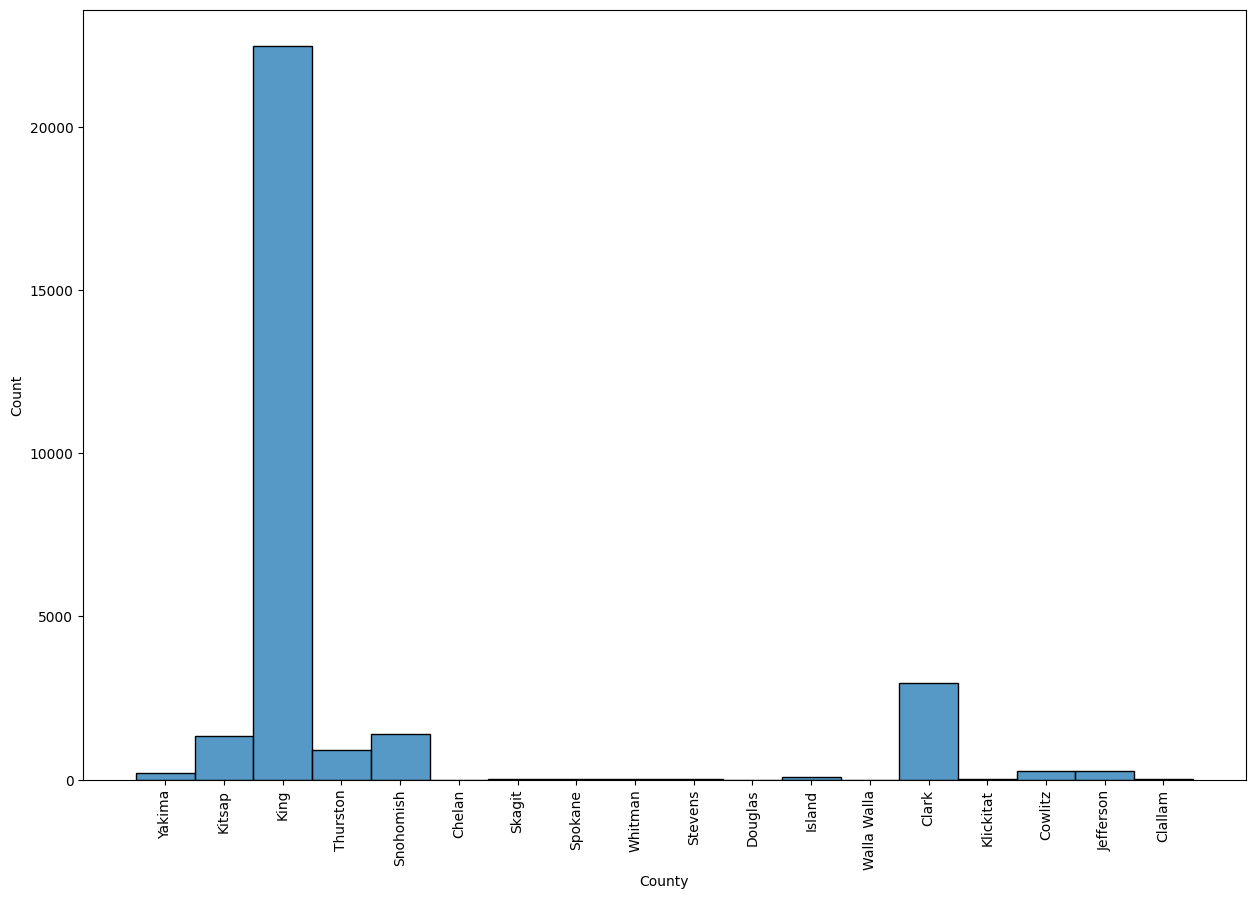

In [ ]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(df['County'][0:30000])
plt.xticks(rotation ="vertical")
plt.show()

The above graph shows there are vertical bars for 14 counties. The heights of the bars represent the number of people in each county.It shows King has high count followed by Clark and Snohomish.

*Creates a histogram showing the distribution of the first 4000 city names in the "City" column of a DataFrame. The X-axis labels are rotated vertically for better readability, especially when dealing with many unique city names.*

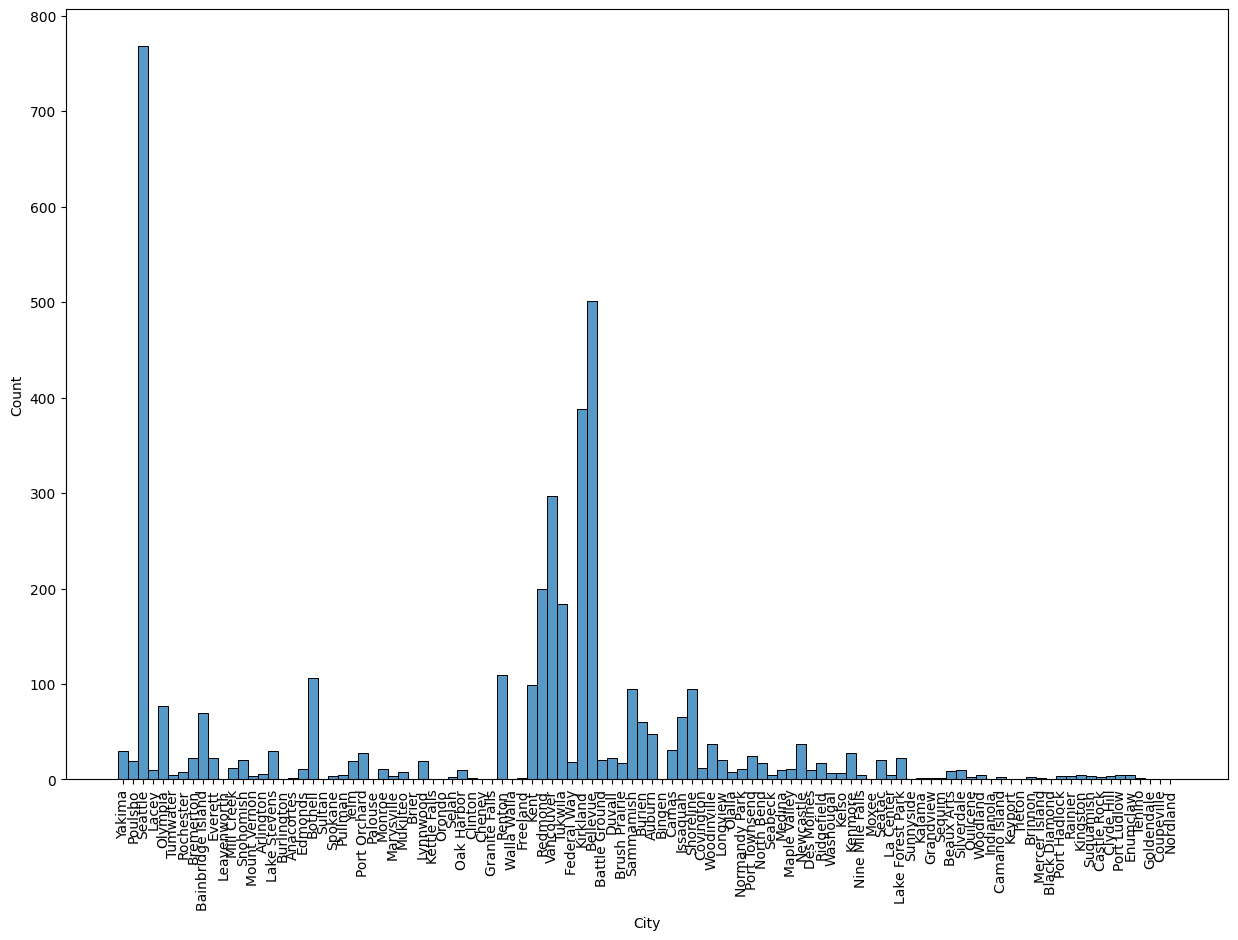

In [ ]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(df['City'][0:4000])
plt.xticks(rotation ="vertical")
plt.show()

The above graph shows city vs count graph. It shows high count on Seattle followed by Bellevue and Kirkland.

*Create a histogram of the 'State' column in the DataFrame*

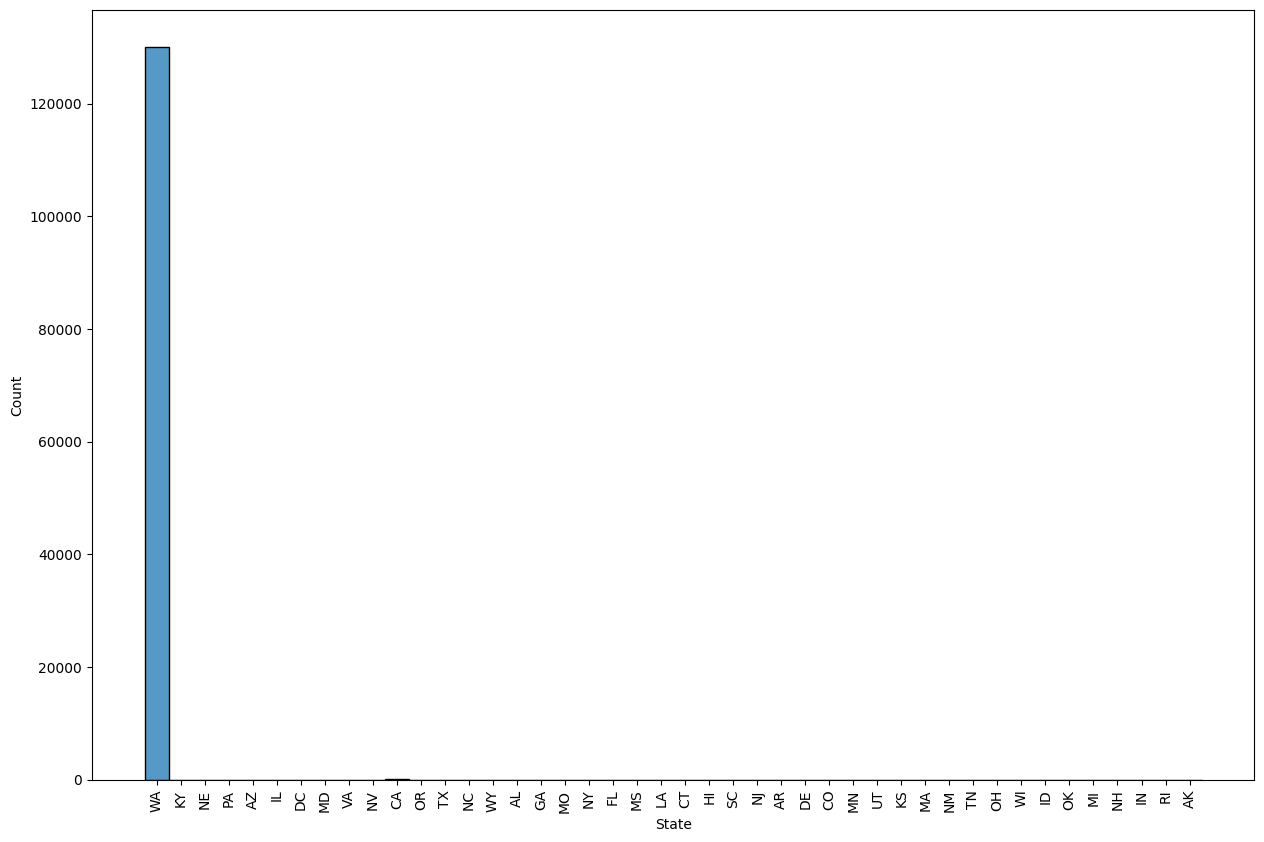

In [ ]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(df['State'])
plt.xticks(rotation ="vertical")
plt.show()

This indicates a high count in Washington, followed by California, while other states have comparatively smaller values.

*Create a histogram of Model Year*

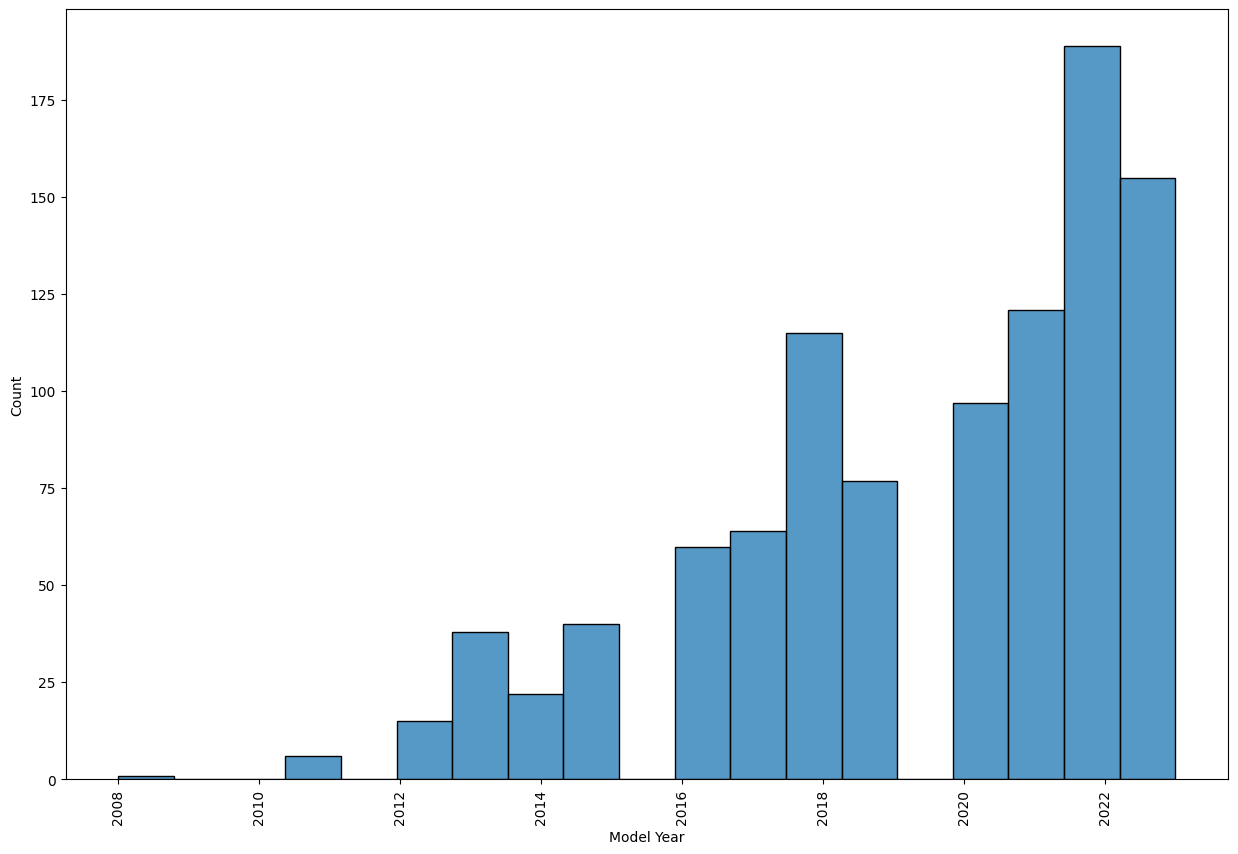

In [ ]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(df['Model Year'][0:1000])
plt.xticks(rotation ="vertical")
plt.show()

The graph provided with the following characteristics:

Time Span: It covers years from 2008 to 2021.

Value Range: The y-axis values range from 0 to 175.

Trend: There is an increasing trend starting from 2016, with a significant rise in values.

Peak Value: The year 2021 shows the highest value, close to or slightly above 175.

*The graph depicting Make vs Count*

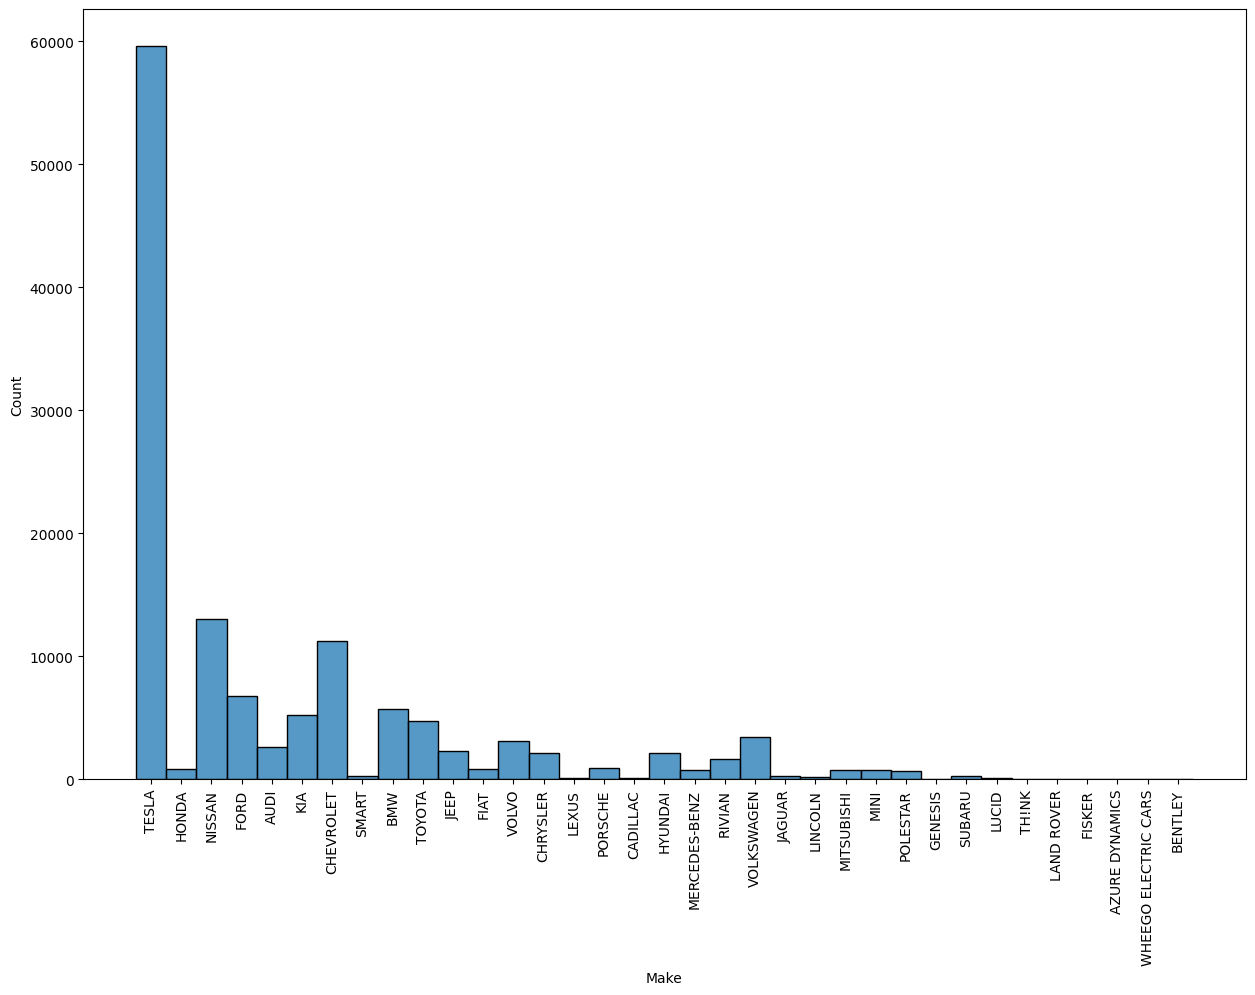

In [ ]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(df['Make'])
plt.xticks(rotation ="vertical")
plt.show()

In the above graph, Tesla is in the lead by a considerable margin. NIO is in second place, albeit with a significantly lower count than Tesla. AMD is in third, with PLUG and FCEL following.

*The graph of Model vs Count*

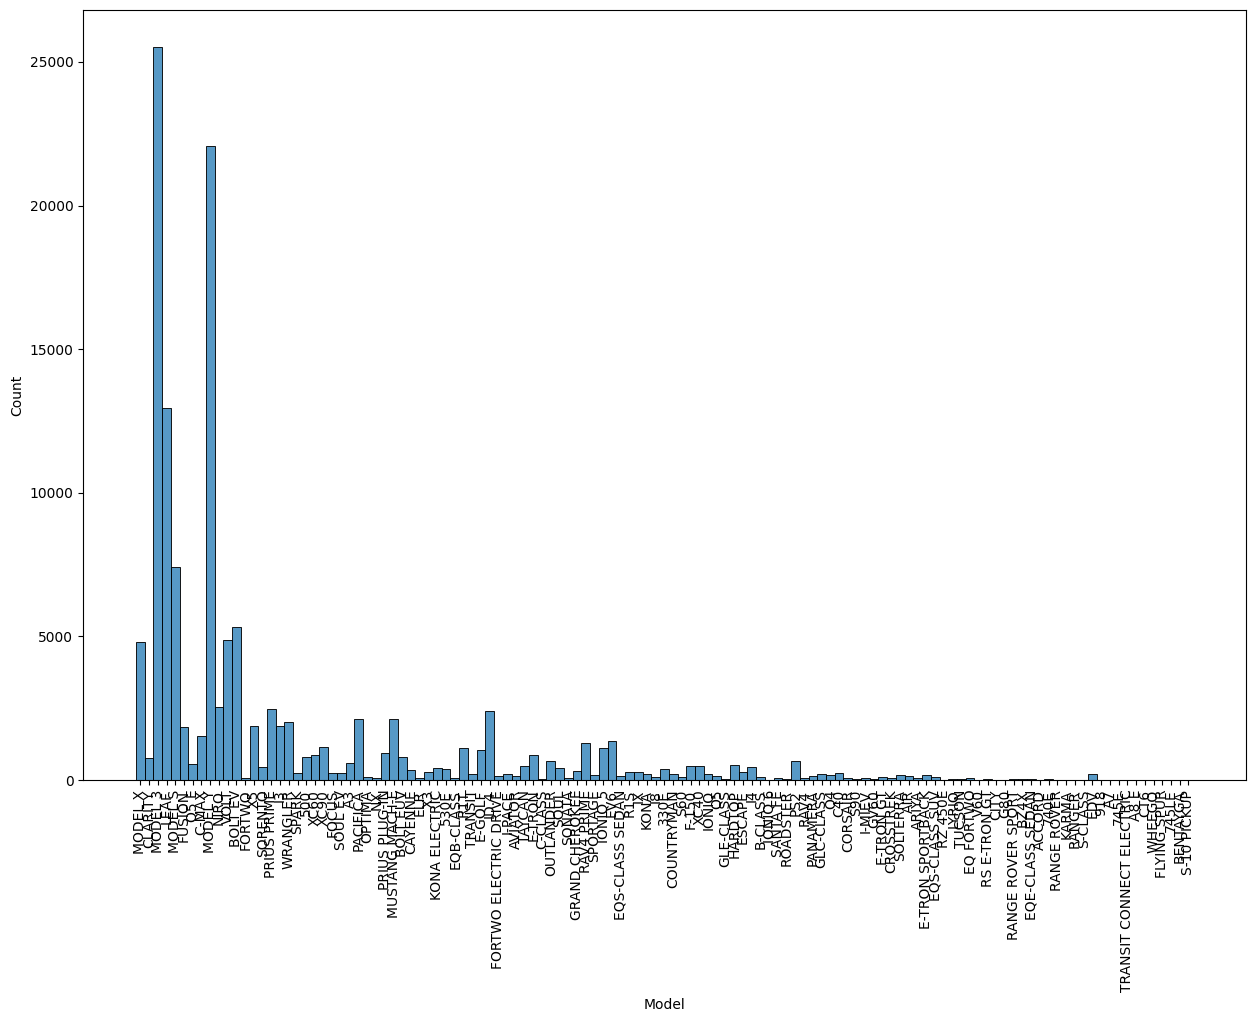

In [ ]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(df['Model'])
plt.xticks(rotation ="vertical")
plt.show()

The graph indicates a high value for MODEL 3, followed by MODEL Y, with LEAF and MODEL S trailing behind.

*Plotting a pie diagram for Clean Alternative Fuel Vehicle (CAFV) Eligibility*

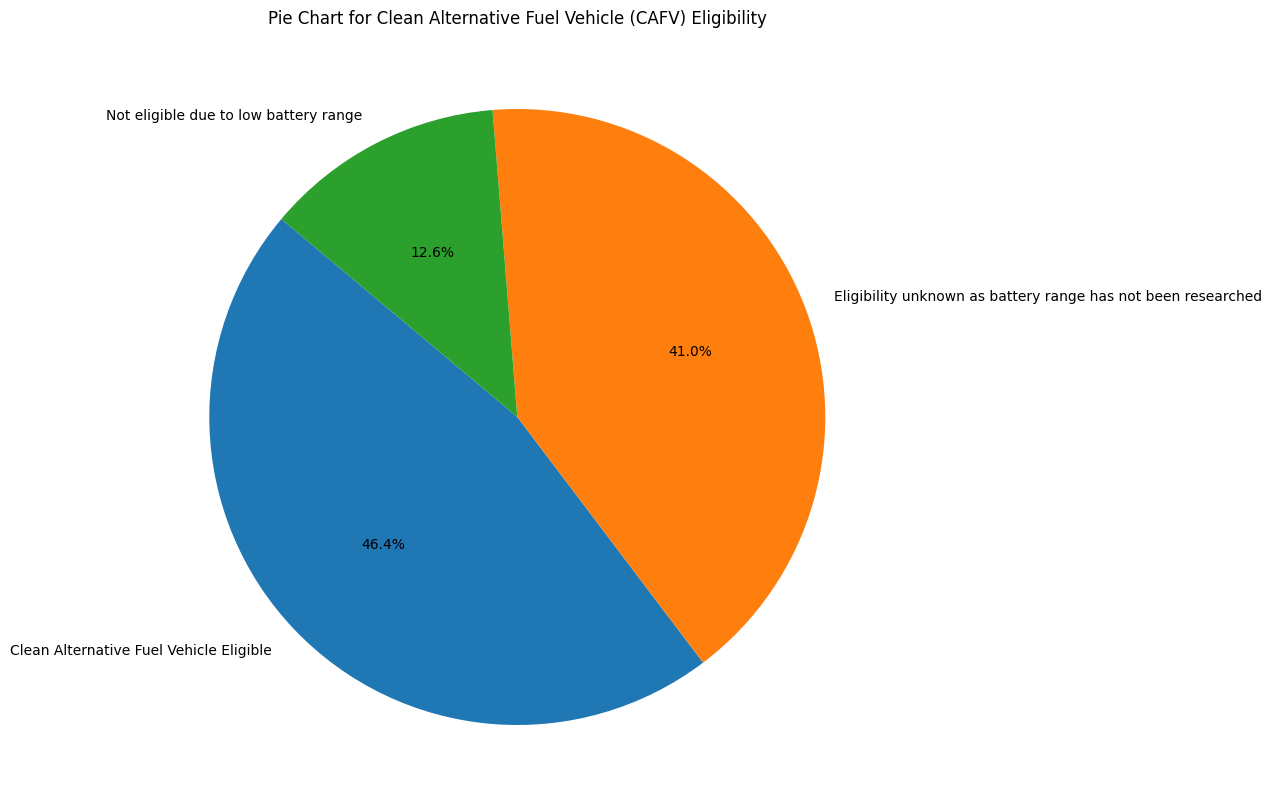

In [ ]:
counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart for Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()

The graph is a pie chart that displays the eligibility of vehicles for the Clean Alternative Fuel Vehicle (CAFV) program based on their battery range. It includes three categories:

Not Eligible: Represents 46.4% of the vehicles that do not qualify due to low battery range.

CAFV Eligible: Accounts for 41.0% of the vehicles that are eligible for the CAFV program.

Unknown Eligibility: Makes up 12.6% of the vehicles where the battery range has not been researched, thus their eligibility status is unknown

*Plot a bar chart of vehicle counts by Electric Vehicle Type*

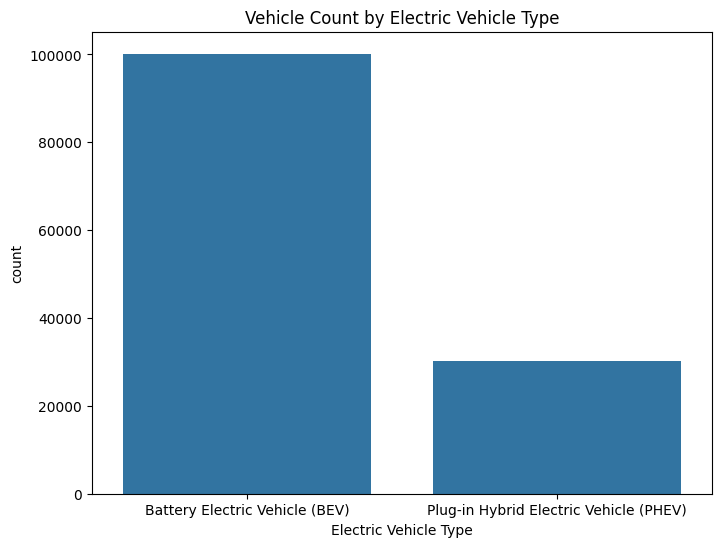

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Electric Vehicle Type')
plt.title('Vehicle Count by Electric Vehicle Type')
plt.show()

The bar graph shows a significantly higher count of Battery Electric Vehicles (BEV) compared to Plug-in Hybrid Electric Vehicles (PHEV).

BEV also have far superior range averaging around 200 miles while PHEV have range of only about 20-50 miles.

Barely 12% of the vehicles do not have clean alternative feul eligibility which indicates a greener initiative

**Bivariate Analysis**

Text(0.5, 1.0, 'Electric Range of Vehicle over a decade')

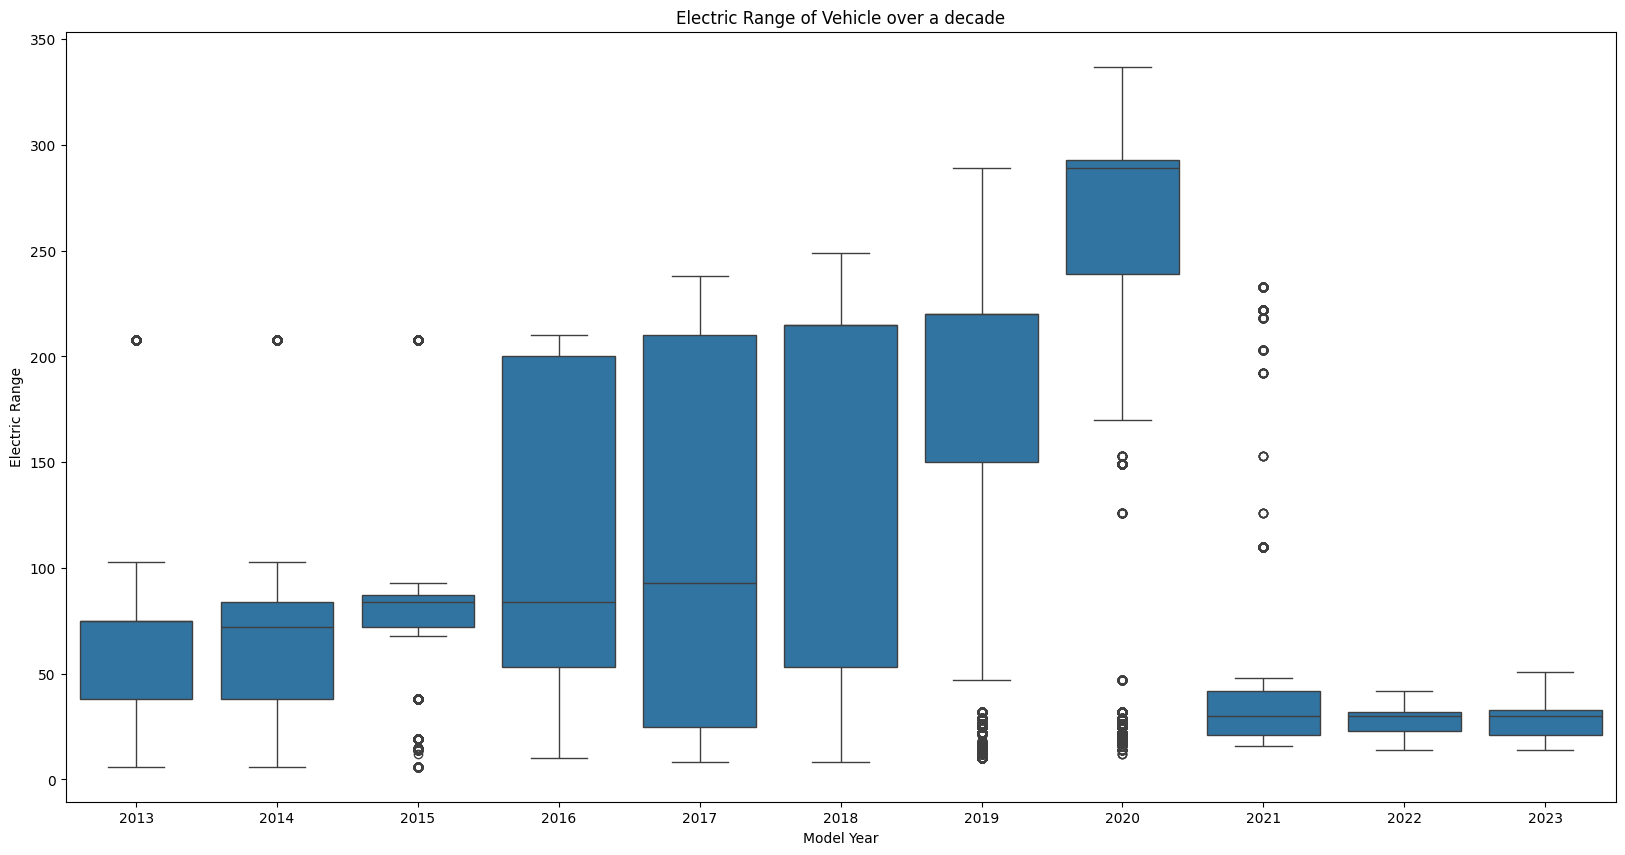

In [ ]:
df1 = df[(df['Electric Range']>0) & (df['Model Year']>2012)]
plt.figure(figsize=(20,10))
sns.boxplot(data = df1, x='Model Year',y='Electric Range')
plt.title("Electric Range of Vehicle over a decade")

Text(0.5, 1.0, 'Electric Range of Vehicle for different Makes')

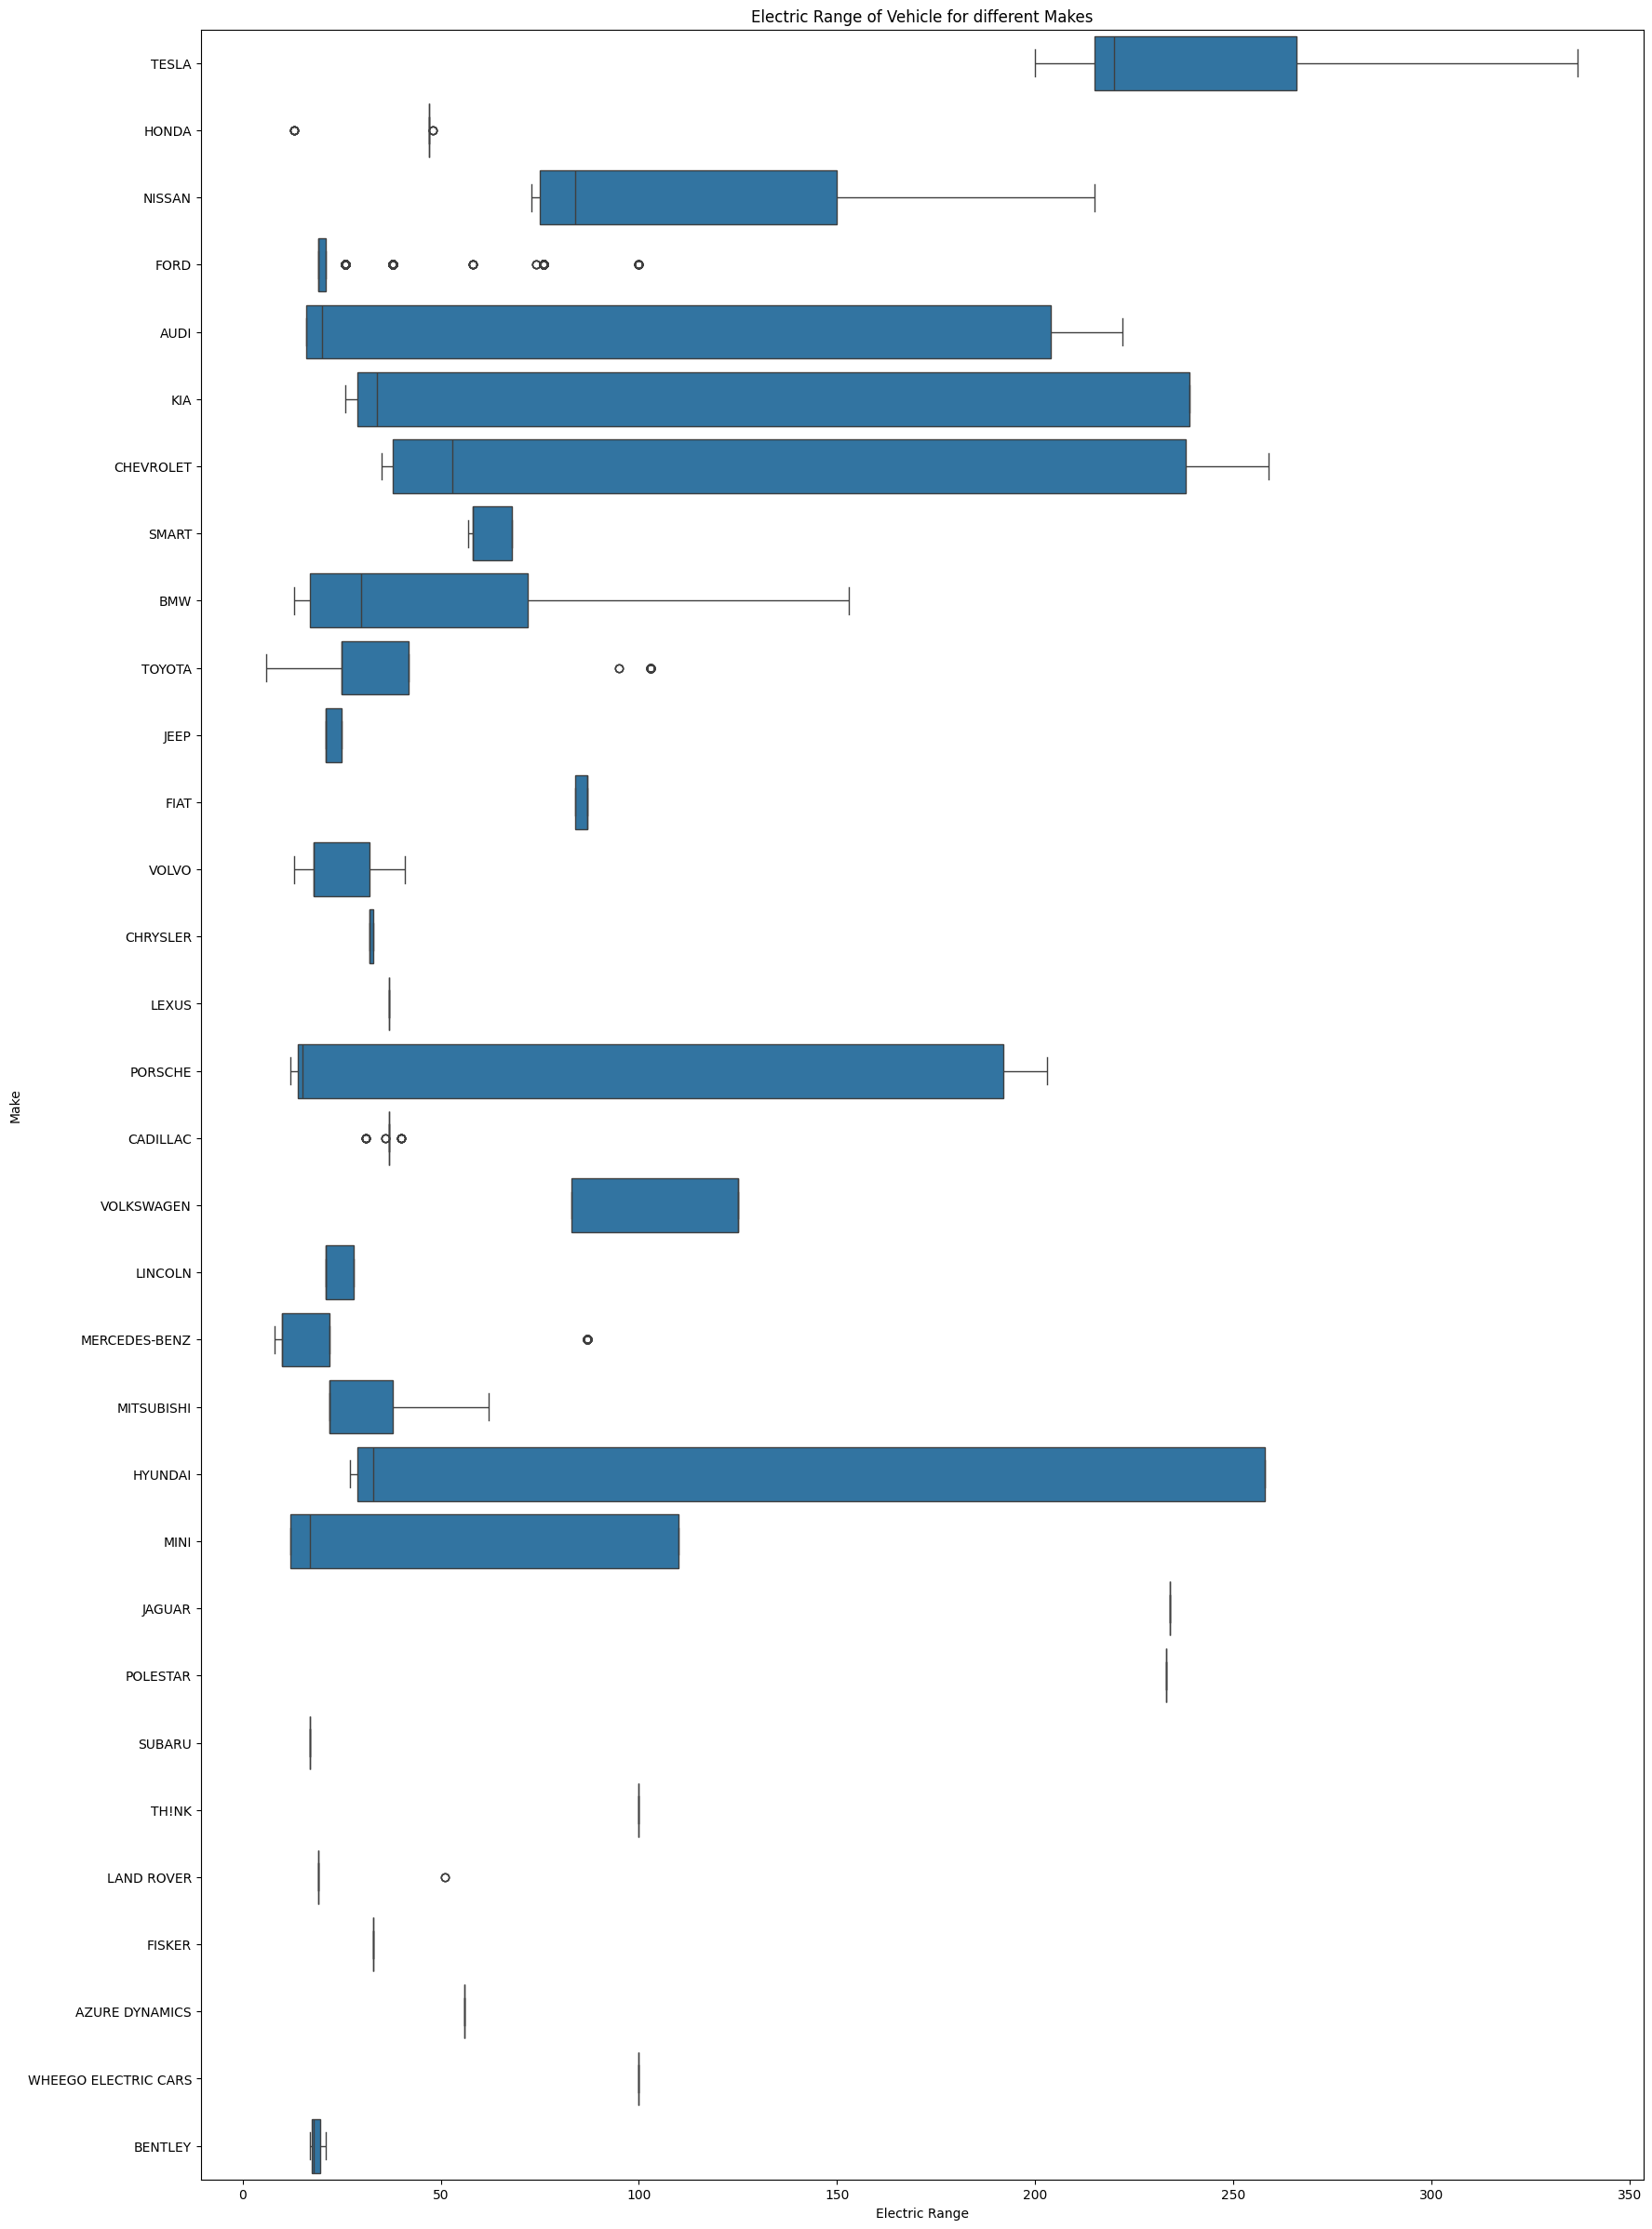

In [ ]:
data_clean = df[(df['Electric Range']>0)]
plt.figure(figsize=(20,30))
sns.boxplot(data = data_clean, y='Make',x='Electric Range')
plt.title("Electric Range of Vehicle for different Makes")

The range of EV's have been increasing steadily over the past decades and peaking to even above 300 miles.
Tesla seems to dominate others with a superior range peaking at 377 miles

*Range of EV and Electric Vehicle Type*

<ipython-input-25-7c6f73f4d647>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df1 , x='Electric Vehicle Type',y='Electric Range',palette=['#1e9570','#F5F5F5'])


Text(0.5, 1.0, 'Range of EV based on its Type')

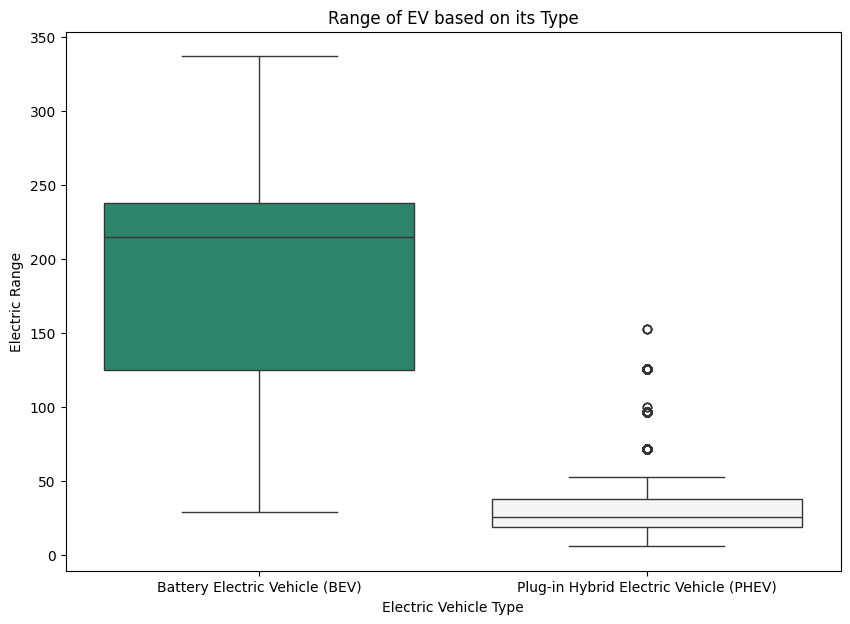

In [ ]:
df1 = df[(df['Electric Range']>0)]
plt.figure(figsize=(10,7))
sns.boxplot(data = df1 , x='Electric Vehicle Type',y='Electric Range',palette=['#1e9570','#F5F5F5'])
plt.title('Range of EV based on its Type')

The BEVs appear to have a longer overall electric range than PHEVs. The BEV IQR spans from roughly 150 to 300 miles, while the PHEV IQR is between 100 and 200 miles.
The BEV median (represented by the line in the middle of the box) is also higher than the PHEV median, suggesting a higher central tendency for electric range in BEVs.
The spread of data seems to be larger for BEVs as their whiskers extend further than the PHEV whiskers. This indicates a greater range of electric range values within the BEV category. There are also more outliers for BEVs, represented by the circles beyond the whiskers.

*Plot the time series of electric vehicle adoption*

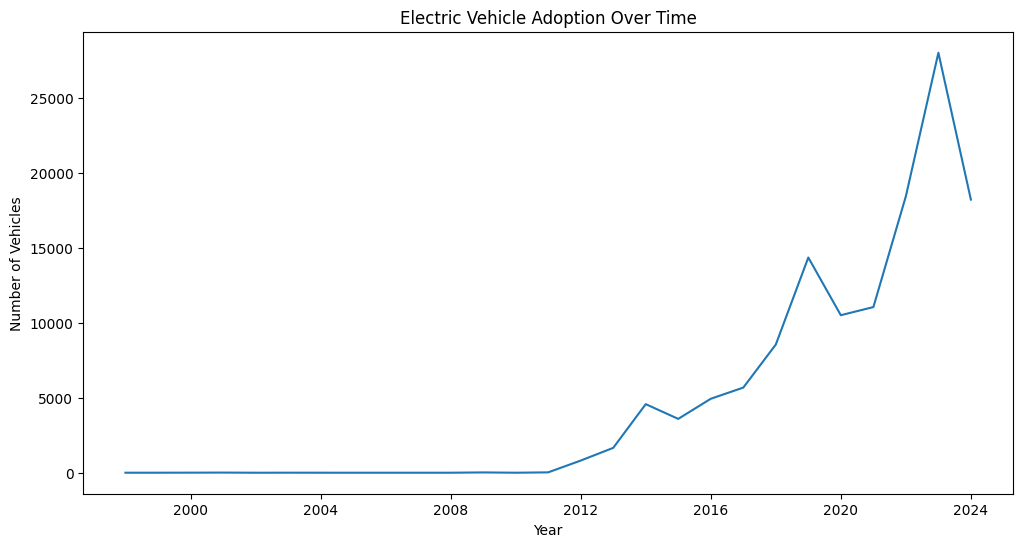

In [ ]:
# Convert 'Model Year' column to datetime format
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

# Set 'Model Year' as the index
df.set_index('Model Year', inplace=True)

# Group the data by year and count the number of vehicles
yearly_counts = df.resample('Y').size()

# Plot the time series of electric vehicle adoption
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts)
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()

The graph titled “Electric Vehicle Adoption Over Time” illustrates the trend in the number of electric vehicles from the year 2000 to 2024. Here are the key takeaways:

Steady Growth: From 2000 to around 2016, there was a gradual increase in electric vehicle numbers.

Significant Spike: After 2016, there’s a sharp rise in adoption, indicating a growing interest in electric vehicles.

Peak in 2024: The highest point is reached around 2024, suggesting a peak in electric vehicle adoption.

Slight Decline: Post-2024, there is a minor drop, which could indicate market saturation or other factors affecting adoption rates.

*Pairplot analysis of Electric Vehicle Type and other characteristics*

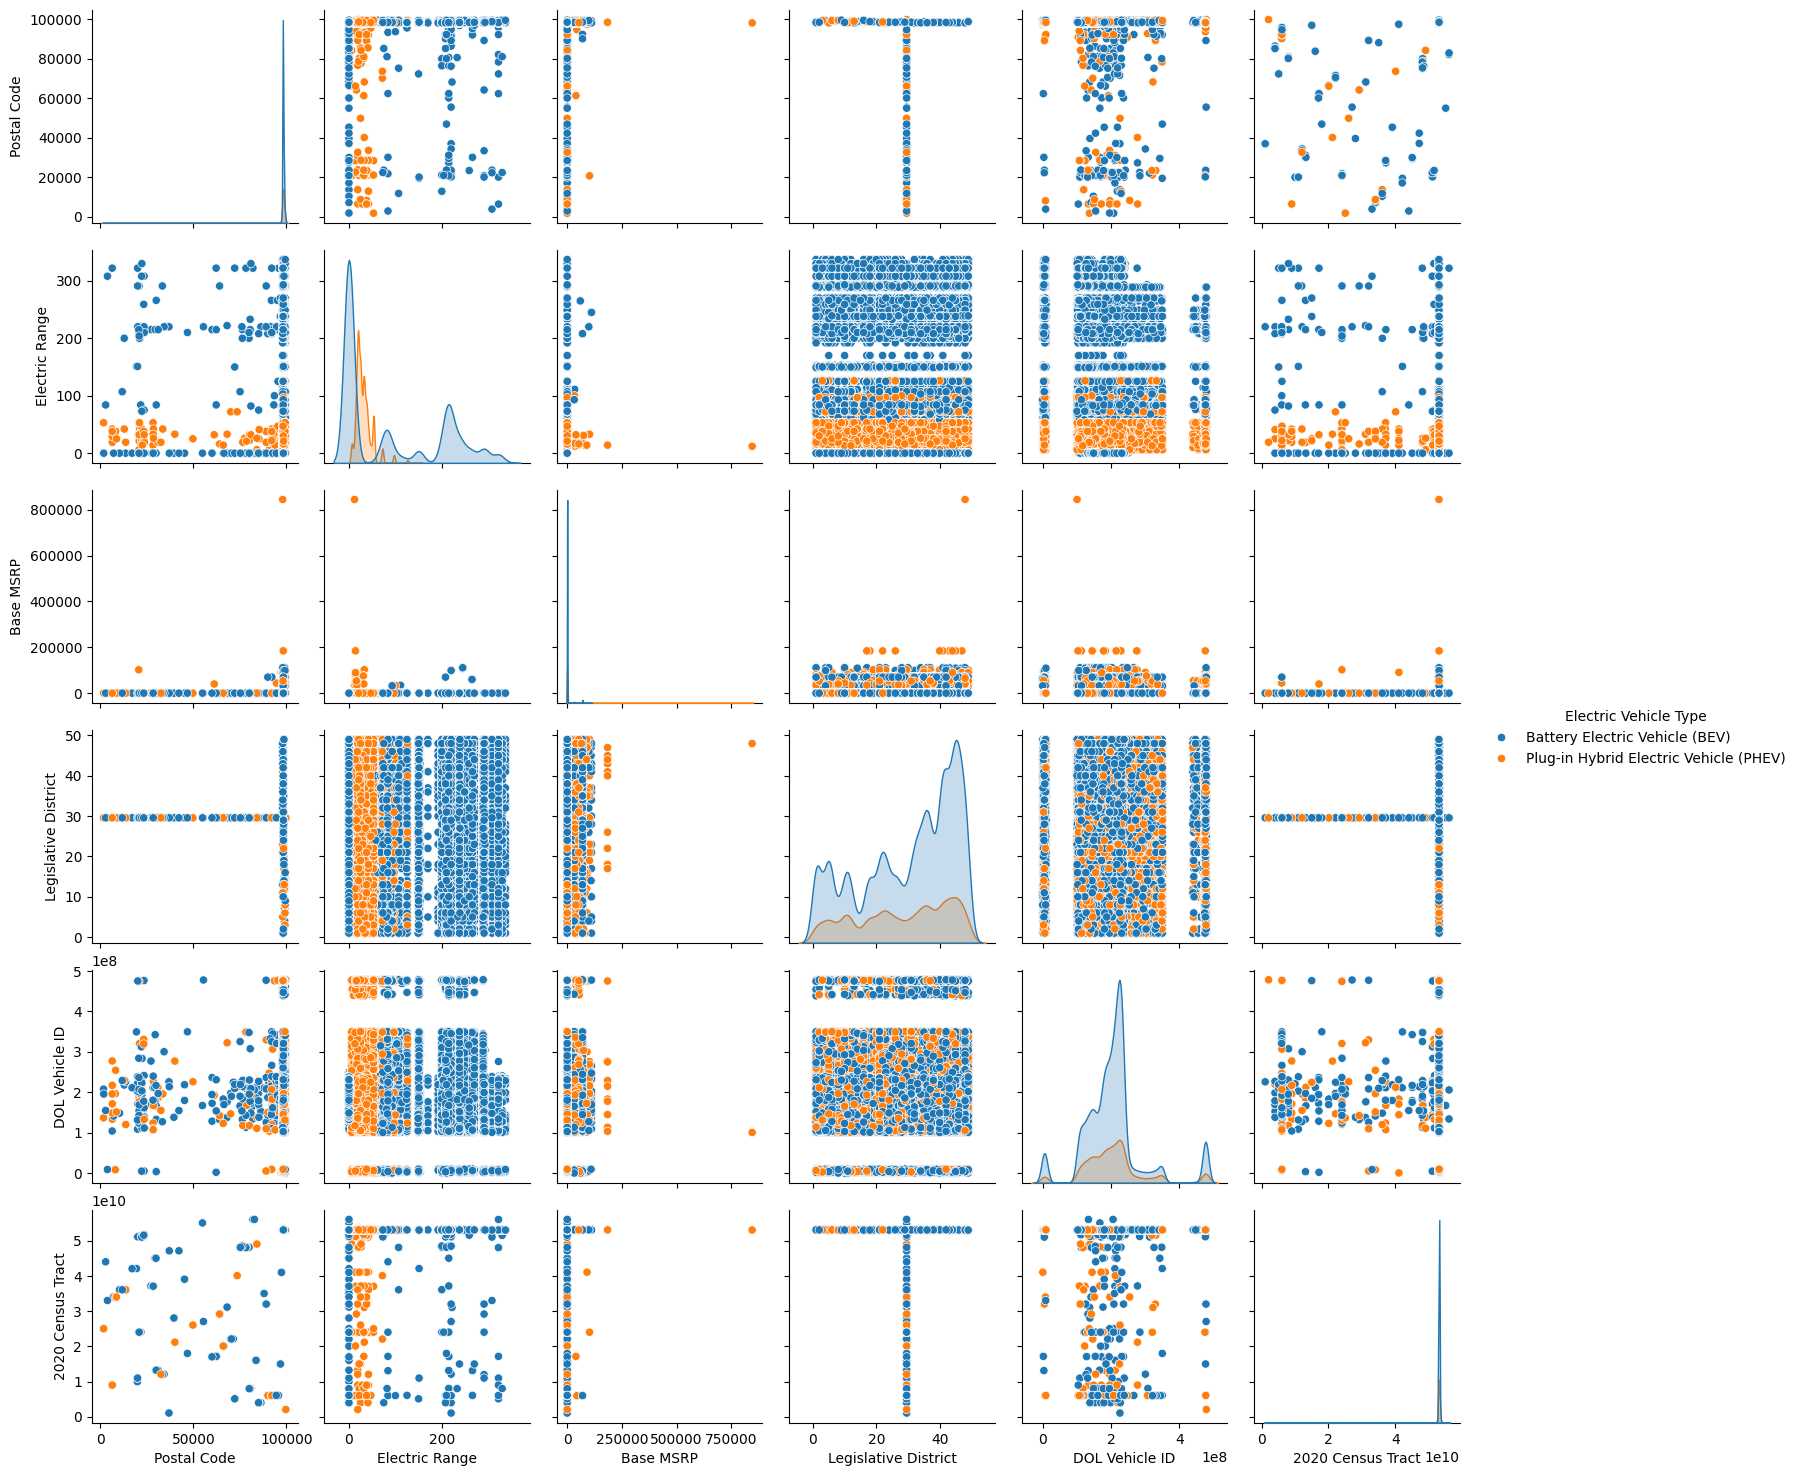

In [ ]:
# pairplot with hue Electric Vehicle Type
sns.pairplot(df, hue ='Electric Vehicle Type')
# to show
plt.show()

The graph above justifies that there are not many features that have a strong linear correlation between features.

The scatter plots show how two variables correlate with each other, while the histograms display the frequency distribution of a single variable. The  “Electric Vehicle Type” and “Plug-in Hybrid Electric Vehicles (PHEV)” suggest that the data pertains to different types of electric vehicles and their characteristics. The plots likely compare various features such as battery range, price, or other specifications relevant to electric vehicles.

**Encoding**

Label encoding assigns numerical labels to categories in a somewhat arbitrary order. The first category encountered will be assigned label 0, the second label 1, and so on.

In [7]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for j in categorical_columns:
  df[j]=lab.fit_transform(df[j])

**FEATURE ENGINEERING**

**Correlation matrix**

correlation matrix is useful for understanding how variables relate to each other. It help identify strong correlations, which can guide feature selection

In [8]:
# finding the correlation matrix
correlation_matrix = df.corr()
#Displaying the first five rows of correlation matrix
correlation_matrix.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
VIN (1-10),1.000000,-0.019532,-0.014429,-0.000766,-0.002876,0.205477,0.234394,0.051927,0.021267,0.197053,-0.163903,0.087049,5.222317e-02,-0.020545,-0.008309,0.016996,-0.000859
County,-0.019532,1.000000,-0.179924,-0.001461,0.020229,-0.027300,-0.021030,-0.007330,0.007617,0.001521,-0.011675,-0.001394,-1.143578e-01,-0.002874,-0.041552,0.129569,0.008899
City,-0.014429,-0.179924,1.000000,0.005782,0.039033,0.002656,-0.037096,-0.003702,0.031991,0.006789,-0.006767,-0.009309,2.995354e-02,0.002008,0.033423,-0.261699,0.004103
State,-0.000766,-0.001461,0.005782,1.000000,0.485885,0.003015,-0.001486,-0.003045,-0.010997,-0.005115,0.000435,-0.000365,-1.562200e-14,0.004525,0.002158,-0.003772,0.998826
Postal Code,-0.002876,0.020229,0.039033,0.485885,1.000000,-0.002636,-0.008621,-0.004433,-0.001201,0.000371,-0.001523,0.001284,-5.146364e-02,0.005055,-0.114643,-0.076859,0.490946


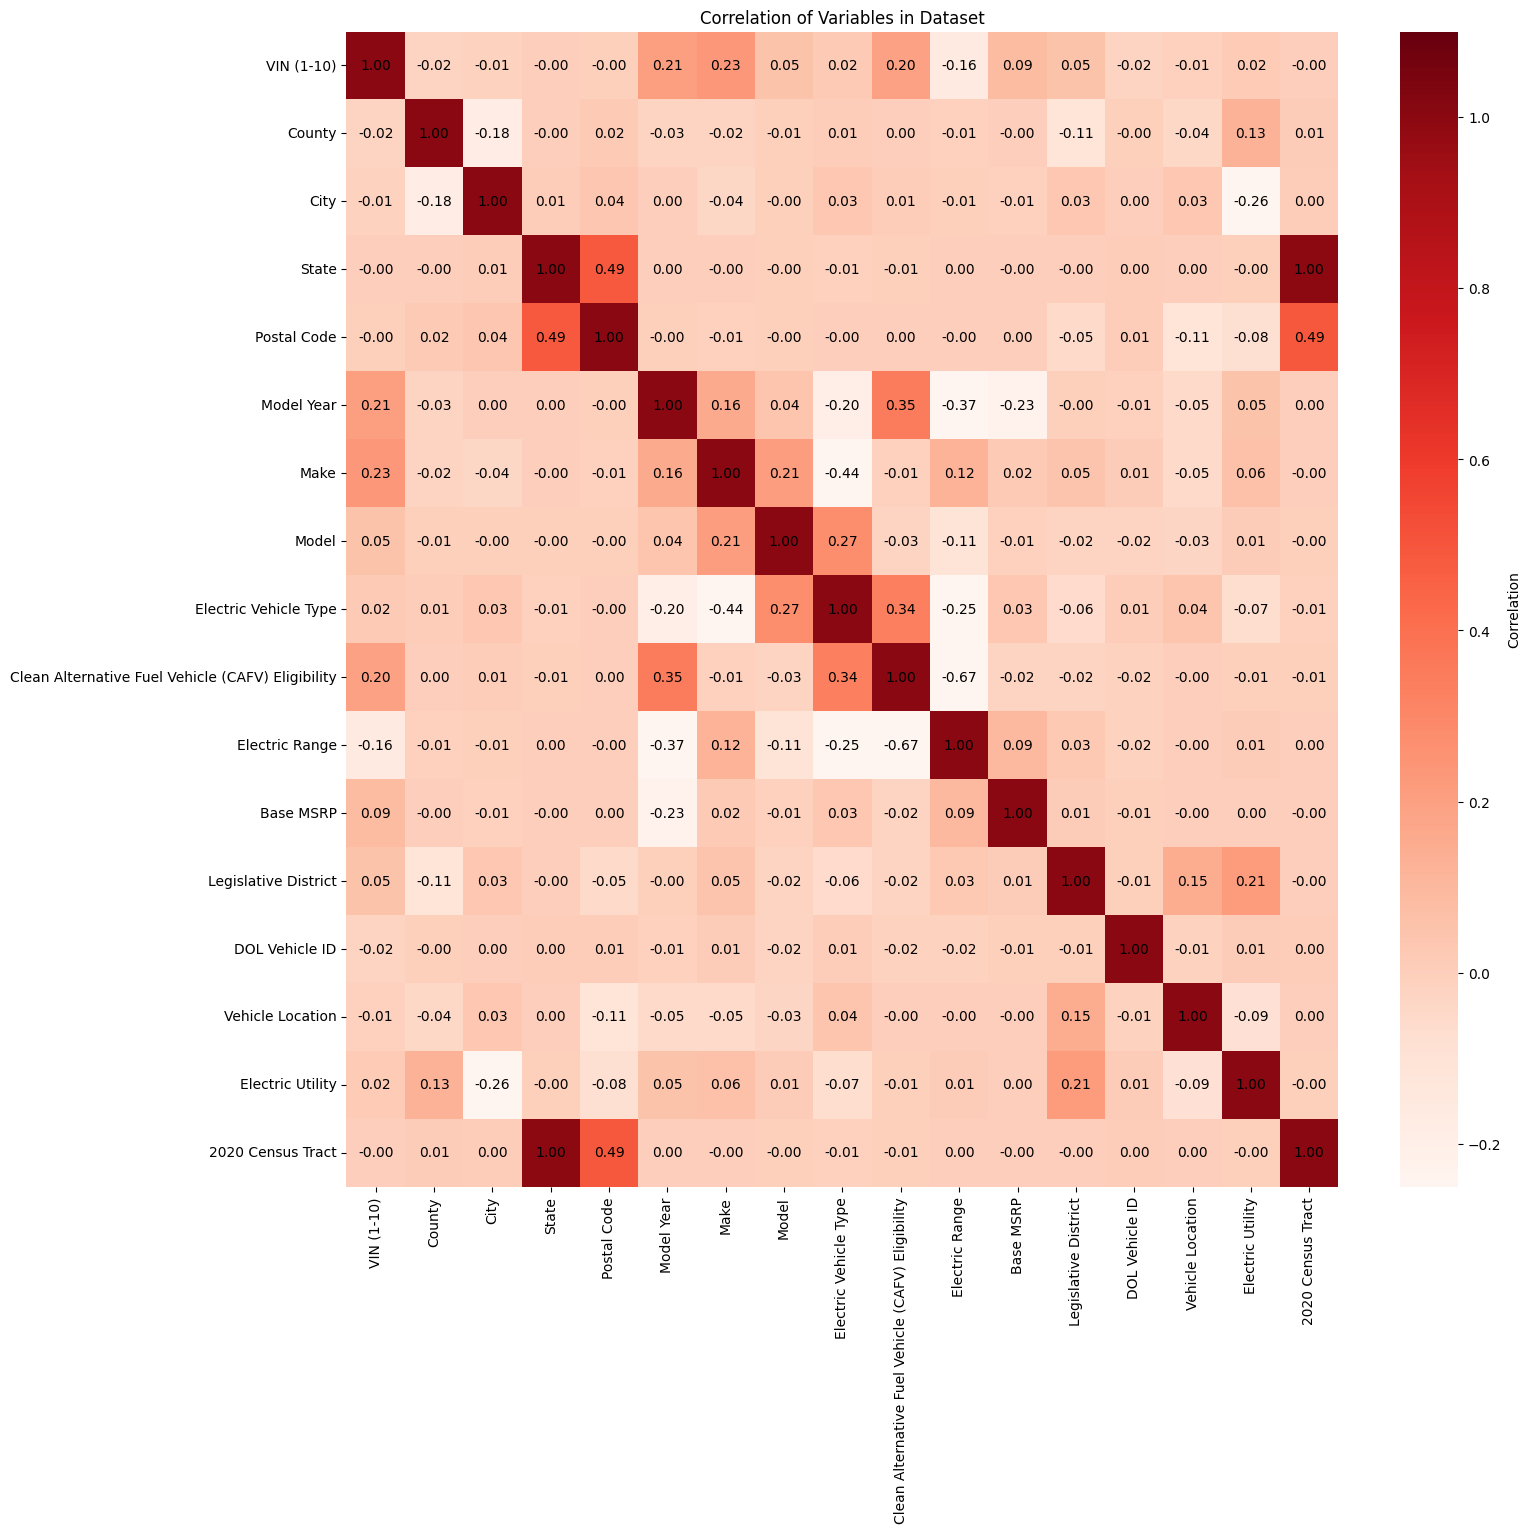

In [9]:
fig = plt.figure(figsize=(16,15))
plt.title('Correlation of Variables in Dataset')
heatmap = sns.heatmap(correlation_matrix, cmap='Reds', annot= True, vmin=-0.25, vmax=1.1, fmt= '.2f', cbar_kws={'label': 'Correlation'}, annot_kws={'color': 'black'})

Here, we compare values with a positive correlation between the Electric Vehicle Type and features in the dataset:

  1. CAFV Eligibility:There is a strong positive correlation (0.34) between Electric Vehicle Type and CAFV Eligibility. This suggests that the type of electric vehicle is closely related to its eligibility for clear alternative fuel program.

  2. Model : The model indicates a positive correlation of 0.27 between Electric Vehicle Type and Model.
  3. Vehicle Location: There is a positive correlation of 0.04 between the type of electric vehicle and its location.

4. City and Base MSRP: There is a positive correlation of 0.03 between the type of electric vehicle, the city, and the Base Manufacturer's Suggested Retail Price (MSRP).

Comparing the values of negative correlation with Electric Vehicle Type in the data you provided, we can see the following:

1. The Electric Vehicle Type is negatively correlated with the Make, showing a correlation coefficient of -0.44. This means that there is a moderately strong negative relationship between the two variables.
2.  Electric Vehicle Type has a negative correlation with Electric Range of -0.27. As the Electric Vehicle Type value increases, the Electric Range value tends to decrease.
2. Electric Vehicle Type also has a negative correlation with Legislative District of -0.06. This is a very weak negative relationship, indicating a very slight tendency for Electric Vehicle Type values to decrease as Legislative District values increase.





Let's find features positively correlated with "Electric Vehicle Type" in a correlation matrix.

It filters the correlation matrix to only include rows where the correlation with "Electric Vehicle Type" is greater than zero (positive correlation).

In [10]:
positive_correlations = correlation_matrix[correlation_matrix['Electric Vehicle Type'] > 0]

# Get the column names of positively correlated features
positive_features = positive_correlations.index.tolist()

print("Features with positive correlation to Electric Vehicle Type:")
print(positive_features)

Features with positive correlation to Electric Vehicle Type:
['VIN (1-10)', 'County', 'City', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location']


It extracts the names (index labels) of those features, which represent the features that have a positive association with "Electric Vehicle Type" in the data.

In [11]:
# Create a DataFrame with these selected features and a copy of the 'Electric Vehicle Type' column
data_prediction = df[positive_features].copy()
data_prediction['Electric Vehicle Type'] = df['Electric Vehicle Type']

In [ ]:
#displaying the first 5 rows of data prediction
data_prediction.head()

,VIN (1-10),County,City,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,DOL Vehicle ID,Vehicle Location
Model Year,,,,,,,,,
2018-01-01,3406,164,652,71,0,0,0,141151601,233
2021-01-01,4297,74,449,24,1,0,0,171566447,504
2019-01-01,2730,72,513,69,0,0,0,9426525,432
2013-01-01,1229,72,513,67,0,0,0,211807760,421
2017-01-01,3043,153,281,70,0,0,0,185810306,532


Splitting features and target from dataset

In [12]:
x=data_prediction.drop(['Electric Vehicle Type'],axis=1).values
y=df['Electric Vehicle Type']

In [13]:
# training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

Normalisation using standard scaler

In [14]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**MODEL TRAINING**

**NAIVE BAYES ALGORITHM**

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print('confusion matrix for default naive bayes classification',confusion_matrix(y_test,y_pred))
print('accuracy score for default naive bayes classification',accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

confusion matrix for default naive bayes classification [[28257  1782]
 [ 1987  7106]]
accuracy score for default naive bayes classification 0.9036849637125626
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     30244
           1       0.78      0.80      0.79      8888

    accuracy                           0.90     39132
   macro avg       0.86      0.87      0.86     39132
weighted avg       0.90      0.90      0.90     39132



Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
nb_before_cv_accuracy=cross_val_score(nb,x_train,y_train,cv=kf, n_jobs=-1, scoring='accuracy').mean()
print(f"The cross-validation accuracy for untuned Naive Bayes after a 10 fold cross validation:")
print("Accuracy :", nb_before_cv_accuracy)

The cross-validation accuracy for untuned Naive Bayes after a 10 fold cross validation:
Accuracy : 0.9011039652481951


In [ ]:
print(nb.get_params())

{'priors': None, 'var_smoothing': 1e-09}


Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
# initialize GridSearchCV
grid_nb = GridSearchCV(nb, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_nb.fit(x_train, y_train)
grid_nb.best_params_

{'var_smoothing': 1e-09}

In [20]:
#  Training Naive Bayes with best parameter combination and evaluating
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=1e-09)
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
print('confusion matrix for naive bayes classification',confusion_matrix(y_test,y_pred_nb))
print('accuracy score for naive bayes classification',accuracy_score(y_test,y_pred_nb))
print(classification_report(y_pred_nb,y_test))

confusion matrix for naive bayes classification [[28257  1782]
 [ 1987  7106]]
accuracy score for naive bayes classification 0.9036849637125626
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     30244
           1       0.78      0.80      0.79      8888

    accuracy                           0.90     39132
   macro avg       0.86      0.87      0.86     39132
weighted avg       0.90      0.90      0.90     39132



**RANDOM FOREST ALGORITHM**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=5, criterion='gini')
rf.fit(x_train, y_train)
y_pred1 = rf.predict(x_test)
print('confusion matrix for default random forest classification',confusion_matrix(y_test,y_pred1))
print('accuracy score for default random forest classification',accuracy_score(y_test,y_pred1))
print(classification_report(y_pred1,y_test))

confusion matrix for default random forest classification [[29882   157]
 [  760  8333]]
accuracy score for default random forest classification 0.9765664928958397
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     30642
           1       0.92      0.98      0.95      8490

    accuracy                           0.98     39132
   macro avg       0.96      0.98      0.97     39132
weighted avg       0.98      0.98      0.98     39132



Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf1 = KFold(n_splits=10, shuffle=True, random_state=42)
rf_before_cv_accuracy=cross_val_score(rf,x_train,y_train,cv=kf1, n_jobs=-1, scoring='accuracy').mean()
print(f"The cross-validation accuracy for untuned Random Forest after a 10 fold cross validation:")
print("Accuracy :", rf_before_cv_accuracy)

The cross-validation accuracy for untuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9744491227422009


Grid Search

In [ ]:
# Grid search for Random Forest
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [3, 5, 7, None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=5)
grid_cv.fit(x_train, y_train)

grid_cv.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 100}

In [21]:
#  Training Random Forest with best parameter combination and evaluating
from sklearn.ensemble import RandomForestClassifier
rf_optimised = RandomForestClassifier(n_estimators=100, max_depth=None, criterion='log_loss')
rf_optimised.fit(x_train, y_train)
y_pred_rf = rf_optimised.predict(x_test)
print('confusion matrix for optimised random forest classification',confusion_matrix(y_test,y_pred_rf))
print('accuracy score for optimised random forest classification',accuracy_score(y_test,y_pred_rf))
print(classification_report(y_pred_rf,y_test))

confusion matrix for optimised random forest classification [[29982    57]
 [   15  9078]]
accuracy score for optimised random forest classification 0.9981600735970562
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29997
           1       1.00      0.99      1.00      9135

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132



**SVM**

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
sv=SVC()
sv.fit(x_train,y_train)
y_pred2=sv.predict(x_test)
print('Accuracy score of dataset using svm',accuracy_score(y_test,y_pred2))
print('confusion matrix of dataset using svm',confusion_matrix(y_test,y_pred2))
print(classification_report(y_pred2,y_test))

Accuracy score of dataset using svm 0.9833895533067566
confusion matrix of dataset using svm [[29806   233]
 [  417  8676]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30223
           1       0.95      0.97      0.96      8909

    accuracy                           0.98     39132
   macro avg       0.97      0.98      0.98     39132
weighted avg       0.98      0.98      0.98     39132



Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf2 = KFold(n_splits=10, shuffle=True, random_state=42)
sv_before_cv_accuracy=cross_val_score(sv,x_train,y_train,cv=kf, n_jobs=-1, scoring='accuracy').mean()
print(f"The cross-validation accuracy for untuned SVM after a 10 fold cross validation:")
print("Accuracy :", sv_before_cv_accuracy)

The cross-validation accuracy for untuned SVM after a 10 fold cross validation:
Accuracy : 0.9820497641545363


Grid Search

In [24]:
#  Training SVC with best parameter combination and evaluating

sv_optimised = SVC(kernel='rbf',gamma='auto')
sv_optimised.fit(x_train, y_train)
y_pred_sv = sv_optimised.predict(x_test)
print('confusion matrix for optimised SVM classification',confusion_matrix(y_test,y_pred_sv))
print('accuracy score for optimised SVM classification',accuracy_score(y_test,y_pred_sv))
print(classification_report(y_pred_sv,y_test))

confusion matrix for optimised SVM classification [[29806   233]
 [  417  8676]]
accuracy score for optimised SVM classification 0.9833895533067566
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30223
           1       0.95      0.97      0.96      8909

    accuracy                           0.98     39132
   macro avg       0.97      0.98      0.98     39132
weighted avg       0.98      0.98      0.98     39132



**KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)
print('confusion matrix for KNN classification',confusion_matrix(y_test,y_pred3))
print('accuracy score for KNN classification',accuracy_score(y_test,y_pred3))
print(classification_report(y_pred3,y_test))

confusion matrix for KNN classification [[29728   311]
 [  200  8893]]
accuracy score for KNN classification 0.9869416334457732
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29928
           1       0.98      0.97      0.97      9204

    accuracy                           0.99     39132
   macro avg       0.98      0.98      0.98     39132
weighted avg       0.99      0.99      0.99     39132



CROSS VALIDATION

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
kf3 = KFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn_before_cv_accuracy = cross_val_score(knn, x_train, y_train, cv=kf3, n_jobs=-1, scoring='accuracy').mean()

print(f"The cross-validation accuracy for untuned KNN after a 10-fold cross validation:")
print("Accuracy:", knn_before_cv_accuracy)


The cross-validation accuracy for untuned KNN after a 10-fold cross validation:
Accuracy: 0.9860581834111567


GRID SEARCH

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
grid_cv_knn = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=5, n_jobs=-1)
grid_cv_knn.fit(x_train, y_train)
best_params_knn = grid_cv_knn.best_params_

print(f"The best hyperparameters for KNN are: {best_params_knn}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best hyperparameters for KNN are: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the KNN model with the best parameters found
knn_optimised = KNeighborsClassifier(n_neighbors=3,
                                     weights='distance',
                                     metric='manhattan')

knn_optimised.fit(x_train, y_train)
y_pred_knn = knn_optimised.predict(x_test)
print('Confusion matrix for optimised KNN classification:', confusion_matrix(y_test, y_pred_knn))
print('Accuracy score for optimised KNN classification:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_pred_knn,y_test))

Confusion matrix for optimised KNN classification: [[29812   227]
 [  130  8963]]
Accuracy score for optimised KNN classification: 0.9908770315854033
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29942
           1       0.99      0.98      0.98      9190

    accuracy                           0.99     39132
   macro avg       0.99      0.99      0.99     39132
weighted avg       0.99      0.99      0.99     39132



**XG BOOST ALGORITHM**

In [30]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred4=xgb.predict(x_test)
print('confusion matrix for XGB classification',confusion_matrix(y_test,y_pred4))
print('accuracy score for XGB classification',accuracy_score(y_test,y_pred4))
print(classification_report(y_pred4,y_test))

confusion matrix for XGB classification [[29968    71]
 [   38  9055]]
accuracy score for XGB classification 0.99721455586221
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30006
           1       1.00      0.99      0.99      9126

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132



Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score, KFold
kf4 = KFold(n_splits=10, shuffle=True, random_state=42)
xgb_before_cv_accuracy=cross_val_score(xgb,x_train,y_train,cv=kf4, n_jobs=-1, scoring='accuracy').mean()
print(f"The cross-validation accuracy for untuned XG Boost after a 10 fold cross validation:")
print("Accuracy :", xgb_before_cv_accuracy)

The cross-validation accuracy for untuned XG Boost after a 10 fold cross validation:
Accuracy : 0.9973934383105444


Grid Search

In [33]:
# Grid search for XG Boost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.3, 1],
}


grid_cv = GridSearchCV(XGBClassifier(objective='binary:logistic'), params, verbose=1, cv=5)

grid_cv.fit(x_train, y_train)

grid_cv.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [35]:
#  Training XG Boost with best parameter combination and evaluating

xgb_optimised = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=150,gamma=0.3)
xgb_optimised.fit(x_train, y_train)
y_pred_xgb = xgb_optimised.predict(x_test)
print('confusion matrix for optimised XG Boost classification',confusion_matrix(y_test,y_pred_xgb))
print('accuracy score for optimised XG Boost classification',accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_pred_xgb,y_test))

confusion matrix for optimised XG Boost classification [[29963    76]
 [   14  9079]]
accuracy score for optimised XG Boost classification 0.9977000919963201
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29977
           1       1.00      0.99      1.00      9155

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132



**DECISION TREE**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_pred5 = dt.predict(x_test)
print('confusion matrix for default decision tree classification',confusion_matrix(y_test,y_pred5))
print('accuracy score for default decision tree classification',accuracy_score(y_test,y_pred5))
print(classification_report(y_pred5,y_test))

confusion matrix for default decision tree classification [[30036     3]
 [    4  9089]]
accuracy score for default decision tree classification 0.9998211182663804
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30040
           1       1.00      1.00      1.00      9092

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132



CROSS VALIDATION

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
dt = DecisionTreeClassifier()
kf5 = KFold(n_splits=10, shuffle=True, random_state=42)
dt_cv_accuracy = cross_val_score(dt, x_train, y_train, cv=kf5, n_jobs=-1, scoring='accuracy').mean()
print("The cross-validation accuracy for Decision Tree after a 10-fold cross-validation:")
print("Accuracy :", dt_cv_accuracy)


The cross-validation accuracy for Decision Tree after a 10-fold cross-validation:
Accuracy : 0.9998247703531042


In [37]:
# Grid search for Decision Tree
from sklearn.model_selection import GridSearchCV
params = {
     'criterion': ['gini', 'entropy', 'log_loss'],
     'max_depth': [None, 3, 5, 7],
     'min_samples_split': [2, 3, 4, 5]
}

grid_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)
grid_cv.fit(x_train, y_train)

grid_cv.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [38]:
# Training Decision Tree with best parameter combination and evaluating

dt_optimised = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)
dt_optimised.fit(x_train, y_train)
y_pred_dt = dt_optimised.predict(x_test)
print('confusion matrix for optimised decision tree classification',confusion_matrix(y_test,y_pred_dt))
print('accuracy score for optimised decision tree classification',accuracy_score(y_test,y_pred_dt))
print(classification_report(y_pred_dt,y_test))

confusion matrix for optimised decision tree classification [[30038     1]
 [    2  9091]]
accuracy score for optimised decision tree classification 0.9999233363998773
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30040
           1       1.00      1.00      1.00      9092

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132



**MODEL EVALUATION**

Model Selection

In [39]:
dict={'Model' :['Naive Bayes', 'Random Forest','SVM','KNN','XG Boost','Decision Tree'],
                "Accuracy": [accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_sv),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_xgb),accuracy_score(y_test,y_pred_dt)]}
model_result = pd.DataFrame(dict).sort_values(by=[ 'Accuracy'], ascending= False).reset_index(drop=True)
model_result

,Model,Accuracy
0,Decision Tree,0.999923
1,Random Forest,0.998160
2,XG Boost,0.997700
3,KNN,0.990877
4,SVM,0.983390
5,Naive Bayes,0.903685


In this particular case, the relative proportions of False Positives (FP) and False Negatives (FN) do not have significant implications for the business. Consequently, the primary focus is to develop a model that can accurately predict the target variable. Therefore, the evaluation metrics employed are accuracy, which measures the proportion of correct predictions out of the total samples, which assesses the model's ability to discriminate between the two classes.

By prioritizing accuracy, the goal is to maximize the overall correctness of predictions without specifically emphasizing the trade-off between FP and FN.  This approach allows for a more balanced evaluation and selection of the model based on its ability to predict the target variable accurately.

The best model was chosen from the model that produced the highest accuracy score for the test data and does not indicate overfitting and underfitting. Based on the table above, the model chosen is **Decision Tree** with an accuracy score for test data of 0.999923.

Confusion Matrix of Random Forest (Best Model) for Electric Vehicle Type Prediction

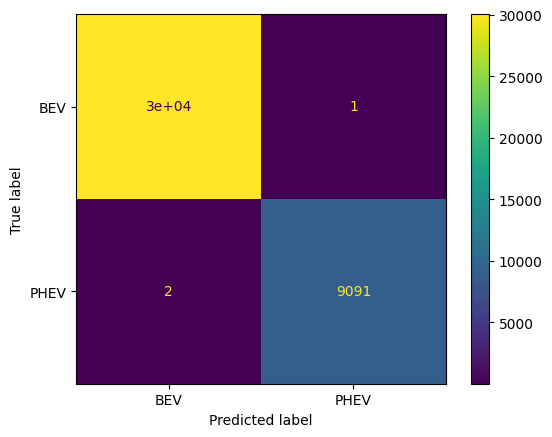

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
mat=confusion_matrix(y_test,y_pred_dt)
# Assuming you have already calculated the confusion matrix 'mat' and defined the labels
label = ['BEV','PHEV']
# Create the ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(mat, display_labels=label)
dis.plot()
plt.show()

Class 0: BEV (Battery Electric Vehicle)
Class 1: PHEV (Plug-in Hybrid Electric Vehicle)

The heatmap above shows the confusion matrix of the best model after the tuning process. It seems the model is performing well at classifying BEVs with a True Positive (TP) value of 30004 and a very low False Negative (FN) of 1 which means the model has high accuracy in predicting class.
On the other hand, the model seems to be struggling more with PHEVs. There is a high False Positive (FP) value of 9,091. This means the model incorrectly classified 9,091 PHEVs as BEVs.

Overall, the model seems to be biased towards classifying electric vehicles as BEVs, resulting in a high number of false positives for PHEVs.